<a href="https://colab.research.google.com/github/LadyHolz/pandas_Tutorial/blob/main/PandasDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

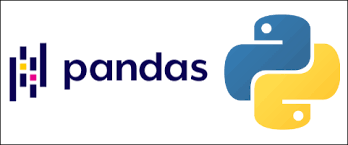

#Pandas

What is Pandas?
Pandas is a library for data manipulation that is built on top of the Python programming language.
Pandas has in-built functions for virtually anything you wish to do with your data such as selecting specific columns or rows, handling missing data, grouping and sorting, merging different data frames and much more.

Pandas is built on top of the NumPy package, meaning a lot of the structure of NumPy is used or replicated in Pandas. Data in pandas is often used to feed statistical analysis in SciPy, plotting functions from Matplotlib, and machine learning algorithms in Scikit-learn.

We are importing pandas a pd

To support our understanding of data we are also importing numpy, seaborn and matplotlib. The naming conventions used np, pd, sns and plt are widly used in the data science comunity

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Mounting google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Using the open() to open the relevant filw in this case we are using Student Performance 

In [3]:
x = open("/content/drive/MyDrive/StudentsPerformance.csv", 'r')

The pandas has a set of top level reader functions to access data like pandas.read_csv() it return a pandas object. 

In [4]:
df = pd.read_csv("/content/drive/MyDrive/StudentsPerformance.csv")

Pandas head() method is used to return top n (5 by default) rows of a data frame or series.  tail() would return the last 5 row of the dataframe.

In [5]:
df.head()  #tail() head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [7]:
df.head(10)  #0 t0 9 following pythons zero index 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Selecting a Single Column
You can pull out any variable (or column) with dot-notation. This single column is stored in a Series, which like a DataFrame with only a single column of data. Here's an example:

In [9]:
# store the series of lunch separately as lunch_data.
lunch_data = df.lunch
## the head command returns the top few lines of data.
print(lunch_data.head(10))

0        standard
1        standard
2        standard
3    free/reduced
4        standard
5        standard
6        standard
7    free/reduced
8    free/reduced
9    free/reduced
Name: lunch, dtype: object


Selecting Multiple Columns

You can select multiple columns from a DataFrame by providing a list of column names inside brackets. Keep in mind, each item in that list should be a string (with quotes).

In [12]:
Two_Colunms = ["gender","math score"]
two_columns_of_data = df[Two_Colunms]
print(two_columns_of_data.head())

   gender  math score
0  female          72
1  female          69
2  female          90
3    male          47
4    male          76


We can analyse the columns to do this we need pandas describe command.

The Describe function returns the statistical summary of the dataframe or series. This includes count, mean, median (or 50th percentile) standard variation, min-max, and percentile values of columns.

As you can see it has picked up the qualitative/numerical data

In [13]:
two_columns_of_data.describe()

,math score
count,1000.00000
mean,66.08900
std,15.16308
min,0.00000
25%,57.00000
50%,66.00000
75%,77.00000
max,100.00000


To analyse our categorical colunms we need to include the "object" as seen below

In [14]:
df.describe(include = 'object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [15]:
two_columns_of_data.describe(include='object')

,gender
count,1000
unique,2
top,female
freq,518


The shape attribute of pandas. DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns) notive the output is stored in brackets

In [16]:
df.shape

(1000, 8)

Checking for missing values. As we can see there are no missing values.

Taking our dataframe df with isna() and summing the coluunms for null values

In [ ]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Lets check the names of our colunms 

In [17]:
# Check the columns.
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Checking the data types of our colunms 

In [18]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Another way to check for null values is .info() our RangeIndex entries match every colunm so we know there are no null values. 

df.info will give us information on null values and data types 

In [ ]:
# I prefer .info() to .dtypes as the former also tells us how many null points we're dealing with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


It good practice to replace blank spaces in colunm names to do this we can use a for loop

In [19]:
df.columns = [c.replace(' ', '_') for c in df.columns]
#replacing spaces with under scores 

Now to check our new colunm names 

In [20]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Some of our colunm names are pretty long let rename them

In [21]:
#renaming colunms 
df.rename(columns={'parental_level_of_education': 'Education_level',
                   'test_preparation_course': 'pre_course'},
          inplace=True, errors='raise')
# Make sure you set inplace to True if you want the change
# to be applied to the dataframe

Check our new colunm names

In [22]:
df.head()

,gender,race/ethnicity,Education_level,lunch,pre_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


We can use pandas to sort values eg: as below the hights math score. 

In [23]:
df.sort_values(by="math_score", ascending=False).head()

,gender,race/ethnicity,Education_level,lunch,pre_course,math_score,reading_score,writing_score
962,female,group E,associate's degree,standard,none,100,100,100
625,male,group D,some college,standard,completed,100,97,99
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
451,female,group E,some college,standard,none,100,92,97


Using the mean function we can get the mean of selected columnms

In [24]:
df["math_score"].mean()

66.089

Summary tables


Lets say we want to see how the observations in our sample are distributed in the context of two variables - gender and pre_course. To do this, we can build a contingency table using the crosstab method.

We can see ore female students completed a pre course

In [25]:
pd.crosstab(df["gender"], df["pre_course"], normalize=True)

pre_course,completed,none
gender,,
female,0.184,0.334
male,0.174,0.308


To delete columns or rows, use the drop method, passing the required indexes and the axis parameter (1 if you delete columns, and nothing or 0 if you delete rows). 

The inplace argument tells whether to change the original DataFrame. With inplace=False, the drop method doesn't change the existing DataFrame and returns a new one with dropped rows or columns. With inplace=True, it alters the DataFrame.

In [26]:
df.drop('lunch', axis=1, inplace=True)
df.head()

,gender,race/ethnicity,Education_level,pre_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,some college,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,some college,none,76,78,75


Using visualisations to visualise our finding. 

Q: Which gender completed more pre course?

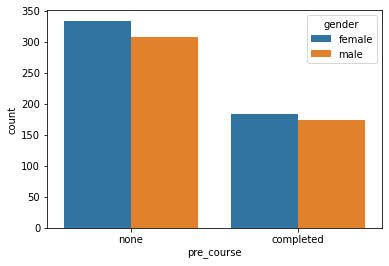

In [27]:
sns.countplot(x="pre_course", hue="gender", data=df);

Q: Does out data set provide more date on males or females?

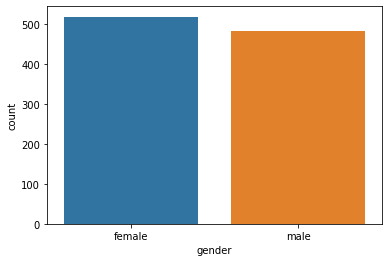

In [28]:
sns.countplot(x="gender", data=df);